<h2>Data</h2>
<br>
File name format&nbsp;&nbsp;: 
Year + Quarter. e.g. 2010Q1 is first quarter in year 2010. The files are in CSV format.
<br>
Total dataset&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 
46, from year 2010 - 2021 with an exception only Q1 and Q2 in year 2021.
<br>
Labels&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 
Vary (1000 - 3000 rows).
<br>
Features&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
7

<h2> Features Description </h2>
<br>
Date&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
The date of the sales (YY-mm-dd).
<br>
Category1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
First word of the item category.
<br>
Category2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
Second word of the item category.
<br>
Category3&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
Third word of the item category.
<br>
Maker&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
The name of the item maker
<br>
Sales&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
Number of sales
<br>
Identifier&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
Item ID

<h2>Objective(s)</h2>
<br>
<li> Exploratory Data Analysis (EDA) </li>
<li> Data cleaning </li>
<li> Data modeling </li>

<h2>----------------------------------------------------------------------------------

**Import libraries and load the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
all_files = glob.glob('dataset' + '/*.csv')

In [3]:
lst = []
for filename in all_files:
    data = pd.read_csv(filename, index_col=None, header=0)
    lst.append(data)

In [4]:
df = pd.concat(lst, axis=0, ignore_index=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134964 entries, 0 to 134963
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        134964 non-null  object 
 1   Category1   134964 non-null  object 
 2   Category2   93196 non-null   object 
 3   Category3   30603 non-null   object 
 4   Maker       134964 non-null  object 
 5   Sales       129588 non-null  float64
 6   Identifier  134964 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.2+ MB


In [10]:
df.head()

,Date,Category1,Category2,Category3,Maker,Sales,Identifier
0,2010-02-15,Air,Conditioners,NaN,Toshino,2143.0,RVFWTWSMNU
1,2010-02-15,Water,Heaters,NaN,Furutani,567.0,PF4KB33DVZ
2,2010-02-15,Washers,&,Dryers,Akaza,3515.0,VUQUQMHODG
3,2010-02-15,Refrigerators,NaN,NaN,Akaza,687.0,XVIOZZOUTN
4,2010-02-15,Washers,&,Dryers,Shimada,435.0,RBRMDIXXGL


In [30]:
df.isnull().sum()

Date               0
Category1          0
Category2      41768
Category3     104361
Maker              0
Sales           5376
Identifier         0
dtype: int64

**Convert `Date` to datetime object**

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134964 entries, 0 to 134963
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        134964 non-null  datetime64[ns]
 1   Category1   134964 non-null  object        
 2   Category2   93196 non-null   object        
 3   Category3   30603 non-null   object        
 4   Maker       134964 non-null  object        
 5   Sales       129588 non-null  float64       
 6   Identifier  134964 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 7.2+ MB


**Combine the words in `Category1`, `Category2`, and `Category3` into one column `Category`**

In [33]:
df['Category'] = np.nan

In [34]:
bool_cat2isnull_cat3isnull = (df['Category2'].isnull()) & (df['Category3'].isnull())
bool_cat2notnull_cat3isnull = (df['Category2'].notnull()) & (df['Category3'].isnull())
bool_cat2notnull_cat3notnull = (df['Category2'].notnull()) & (df['Category3'].notnull())

In [35]:
df['Category'] = df['Category'].mask(bool_cat2isnull_cat3isnull, df['Category1'])
df['Category'] = df['Category'].mask(bool_cat2notnull_cat3isnull, df['Category1'] + ' ' + df['Category2'])
df['Category'] = df['Category'].mask(bool_cat2notnull_cat3notnull, df['Category1'] + ' ' + df['Category2'] + ' ' + df['Category3'])

In [36]:
df.head()

,Date,Category1,Category2,Category3,Maker,Sales,Identifier,Category
0,2010-02-15,Air,Conditioners,NaN,Toshino,2143.0,RVFWTWSMNU,Air Conditioners
1,2010-02-15,Water,Heaters,NaN,Furutani,567.0,PF4KB33DVZ,Water Heaters
2,2010-02-15,Washers,&,Dryers,Akaza,3515.0,VUQUQMHODG,Washers & Dryers
3,2010-02-15,Refrigerators,NaN,NaN,Akaza,687.0,XVIOZZOUTN,Refrigerators
4,2010-02-15,Washers,&,Dryers,Shimada,435.0,RBRMDIXXGL,Washers & Dryers


In [37]:
df['Category'].value_counts()

Refrigerators       19476
Rice Cookers        16695
Ovens & Cooktops    16693
Vacuum Cleaners     13911
Washers & Dryers    13910
Dishwashers         11843
Air Conditioners    11128
Water Heaters       10567
Televisions         10449
Water Pumps         10292
Name: Category, dtype: int64

Drop `Category1`, `Category2`, and `Category3`

In [38]:
df = df.drop(['Category1', 'Category2', 'Category3'], axis=1)

In [39]:
df.head()

,Date,Maker,Sales,Identifier,Category
0,2010-02-15,Toshino,2143.0,RVFWTWSMNU,Air Conditioners
1,2010-02-15,Furutani,567.0,PF4KB33DVZ,Water Heaters
2,2010-02-15,Akaza,3515.0,VUQUQMHODG,Washers & Dryers
3,2010-02-15,Akaza,687.0,XVIOZZOUTN,Refrigerators
4,2010-02-15,Shimada,435.0,RBRMDIXXGL,Washers & Dryers


**Exclude `Identifier` that contains digits (0-9)**

In [40]:
df.shape

(134964, 5)

In [41]:
df = df[~df['Identifier'].str.contains(r'[0-9]')]

In [42]:
df.shape

(93171, 5)

**Fill missing `Sales` with mean**

In [43]:
df.isnull().sum()

Date             0
Maker            0
Sales         3673
Identifier       0
Category         0
dtype: int64

In [46]:
df[df['Sales'].isnull()].head()

,Date,Maker,Sales,Identifier,Category
27,2010-02-15,Omuro,NaN,HWTFIGIXOL,Ovens & Cooktops
54,2010-02-16,Sugiura,NaN,UPJKNMIDRB,Water Heaters
129,2010-02-17,Toshino,NaN,RVFWTWSMNU,Air Conditioners
189,2010-02-19,Akaza,NaN,ZBYVQNRPUP,Vacuum Cleaners
224,2010-02-22,Katayama,NaN,ZWNGQMERMH,Dishwashers


Groupby `Identifier`

In [49]:
grpby_id = df.groupby(by='Identifier').mean().round(2)
grpby_id

,Sales
Identifier,
AHSRVKIOLJ,672.01
AVXSMNNRDX,3226.39
BIBIOOIHA,1045.58
DUVTZNWNAB,363.60
ECQPIOYXZO,6546.64
EFCRJFQTCD,324.19
FRBLLORNXN,411.40
FUWHINIXUA,16321.21
FVDHIZGQRC,11404.04


In [52]:
for identifier, sales_mean in zip(grpby_id.index, grpby_id.values):
    df['Sales'] = df['Sales'].mask((df['Sales'].isnull()) & (df['Identifier'] == identifier), sales_mean)

In [53]:
df.isnull().sum()

Date          0
Maker         0
Sales         0
Identifier    0
Category      0
dtype: int64

In [54]:
df.loc[27]

Date          2010-02-15 00:00:00
Maker                       Omuro
Sales                    24478.66
Identifier             HWTFIGIXOL
Category         Ovens & Cooktops
Name: 27, dtype: object

**Check for Outliers**

In [55]:
df.describe()

,Sales
count,93171.000000
mean,4146.444172
std,6254.450771
min,62.000000
25%,801.000000
50%,1691.000000
75%,4892.000000
max,56785.000000


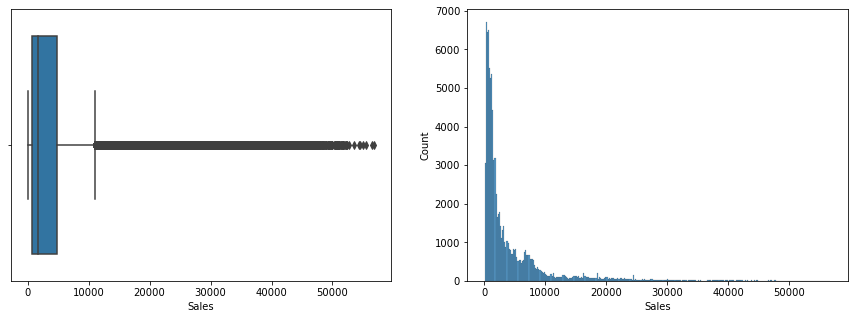

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(ax=ax[0], data=df, x='Sales')
sns.histplot(ax=ax[1], data=df, x='Sales')

plt.show();